In [81]:
from sklearn import datasets
digits = datasets.load_digits()

In [82]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [83]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [84]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


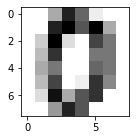

In [85]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (2,2))
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

# SVM - Support Vector Machine

#### É um algoritmo de machine leaning supervisionado usado para criar limites entre grupos de dados
#### Em um gráfico com dois grupos de dados de um número, e queremos saber sobre qual grupo se encaixaria um novo dado entre eles no gráfico. O SVM traça uma linha em que de a maior distancia entre a linha e os pontos mais próximos de cada lado. Essa linha que divide os grupos é chamada de Hyperplane. A soma das duas distâncias dos pontos próximos é a margem. Então o objetivo é traçar a hyperplane a ponto de conseguir a maior margem 

In [86]:
from sklearn.model_selection import train_test_split
x = digits.data
y = digits.target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 5)

In [87]:
from sklearn import svm
#classifier = svm.SVC()
#classifier.fit(x_train, y_train)

In [88]:
#previsoes = classifier.predict(x_test)

In [89]:
from sklearn import metrics
acertos = metrics.accuracy_score(y_test, previsoes)
print(acertos)

0.9777777777777777


# Leitura de imagem de um dígito

In [90]:
import numpy as np 
import matplotlib.image as mpimg

img = mpimg.imread('number2.png')
print(img)
# Essa leitura de imagem esta um pouco diferente porque foram separados em colunas, são 8 matrizes, cada matriz corresponde a uma coluna.
#E em cada matriz, cada linha dessas corresponte a um pixel, mas a cor é separada na escala de cor rgb(red, green, blue)


[[[1.         1.         1.        ]
  [0.8784314  0.8784314  0.8784314 ]
  [0.10196079 0.10196079 0.10196079]
  [0.         0.         0.        ]
  [0.         0.         0.        ]
  [0.44313726 0.44313726 0.44313726]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.5019608  0.5019608  0.5019608 ]
  [0.02745098 0.02745098 0.02745098]
  [0.69411767 0.69411767 0.69411767]
  [0.627451   0.627451   0.627451  ]
  [0.02745098 0.02745098 0.02745098]
  [0.5019608  0.5019608  0.5019608 ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.5019608  0.5019608  0.5019608 ]
  [0.10196079 0.10196079 0.10196079]
  [0.9372549  0.9372549  0.9372549 ]
  [1.         1.         1.        ]
  [0.17254902 0.17254902 0.17254902]
  [0.3764706  0.3764706  0.3764706 ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.8784314  0.8784314  0.8784314 ]
  [0.02745098 0.02745098 0.02745

In [91]:
def rgb2gray(rgb):
    img_array = np.dot(rgb[..., :3], [0.299, 0.587, 0.114])
    img_array = (16 - (img_array * 16)).astype(int)
    img_array = img_array.flatten()   
    
    
    return img_array
    
    
rgb2gray(img)

array([ 0,  1, 14, 16, 16,  8,  0,  0,  0,  7, 15,  4,  5, 15,  7,  0,  0,
        7, 14,  1,  0, 13,  9,  0,  0,  1, 15, 14, 13, 16,  2,  0,  0,  7,
       16, 12, 15, 13,  1,  0,  0, 12,  9,  0,  1, 15,  6,  0,  0,  7, 15,
        7,  4, 15,  5,  0,  0,  0,  7, 15, 16, 13,  1,  0])

### Treinar o computador com as 1700 informações que temos e testa-lo com a imagem que está na pasta do nosso pc

In [92]:
classifier = svm.SVC()
classifier.fit(x, y)

SVC()

In [93]:
previsao = classifier.predict([rgb2gray(img)])
print(previsao)

[8]


### Regressão logística 

In [94]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x, y)
previsoes_logreg = logreg.predict([rgb2gray(img)])

print(previsoes_logreg)


[8]


C:\Users\Notebook\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
